# This script demonstrates finding a line that fits the given data


# Name : Eun-Yeong Jeon

# Student ID : 20153334

## github : https://github.com/Eun0/Assignment

# Import packages for plotting graphs and manipulating data :

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define data :

In [2]:
num     = 201
std     = 20
a       = 2 
b       = 10

n       = np.random.rand(num)
nn      = n - np.mean(n)
x       = np.linspace(-100,100,num)
y1      = a * x + nn * std + b 
y2      = a * x + b

# Plot the graphs for the noisy data and clean data :

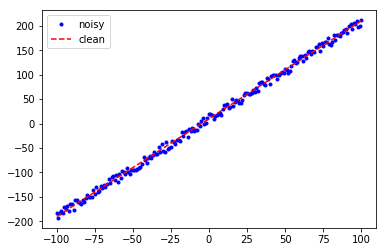

In [3]:
plt.plot(x,y1,'b.',label='noisy')
plt.plot(x,y2,'r--',label='clean')


plt.legend()

plt.show()

# Define fit_least_square(x,y) function :

Find a straight line by least square approximation with x,y data

Basic form of line is as below

$\hat{f}(x)=\theta_{1}+\theta_{2}x$

by using QR factorization, we can obtain

$\rho=\frac{(x^d-avg(x^d)1)^T(y^d-avg(y^d)1)}{Nstd(x^d)std(y^d)}$

where $x^d$ , $y^d$ : training data.

$\hat{\theta} _{2}=\frac{std(y^d)}{std(x^d)}\rho$


$\hat{\theta} _{1}=avg(y^d)-\hat{\theta} _{2}avg(x^d)$


So, result is as below

$\hat{f}(x)=avg(y^d)+\rho\frac{std(y^d)}{std(x^d)}(x-avg(x^d))$



In [4]:
def fit_least_square(x,y):
    
    x_std=np.std(x)
    y_std=np.std(y)
    
    x_avg=np.mean(x)
    y_avg=np.mean(y)
    
    n=len(x)
    
    x_dev=x-x_avg
    y_dev=y-y_avg
    
    numerator=np.dot(x_dev,y_dev)
    denominator=n*x_std*y_std
    
    rho=numerator/denominator
    
    y_hat=y_avg+((rho*y_std*x_dev)/x_std)
    
    
    return y_hat

# Compute approximating line

In [5]:
y_hat=fit_least_square(x,y1)

# Plot the line that fits the noisy data by the least square error

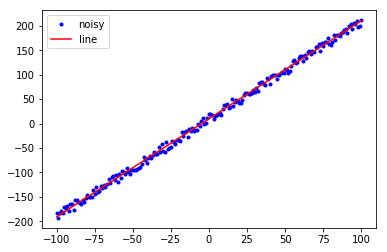

In [6]:
plt.plot(x,y1,'b.',label='noisy')
plt.plot(x,y_hat,'red',label='line')


plt.legend()

plt.show()